<a href="https://colab.research.google.com/github/Pager07/Tensorflow-Data-and-Deployment/blob/master/course%204/week%201/LoadingCSVData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [2]:
import functools

import numpy as np
import tensorflow as tf

In [3]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [4]:
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

#Load data

In [5]:
#where is this function head coming from?
!head {train_file_path}

survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n
1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
1,female,4.0,1,1,16.7,Third,G,Southampton,n


You can load this using pandas, and pass the NumPy arrays to TensorFlow. 
- If you need to scale up to a large set of files, or need a loader that integrates with TensorFlow and tf.data then use the tf.data.experimental.make_csv_dataset function:

The only column you need to identify explicitly is the one with the value that the model is intended to predict. 

In [8]:
LABEL_COLUMN = 'survived'
LABELS = [0,1]

In [11]:
#kwargs  means keyword argument, meaning def add(num=1, num2 =2), ** is saying that we can pass in any number of them
# Literally tf.data.experimental.make_csv_dataset does everything for you 
def get_dataset(file_path,**kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5,
      label_name = LABEL_COLUMN,
      na_value = '?',
      num_epochs = 1 ,
      ignore_errors = True,
      **kwargs
  )
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)


In [12]:
raw_train_data

<PrefetchDataset shapes: (OrderedDict([(sex, (None,)), (age, (None,)), (n_siblings_spouses, (None,)), (parch, (None,)), (fare, (None,)), (class, (None,)), (deck, (None,)), (embark_town, (None,)), (alone, (None,))]), (None,)), types: (OrderedDict([(sex, tf.string), (age, tf.float32), (n_siblings_spouses, tf.int32), (parch, tf.int32), (fare, tf.float32), (class, tf.string), (deck, tf.string), (embark_town, tf.string), (alone, tf.string)]), tf.int32)>

if you try to print what batch is, you will get the following




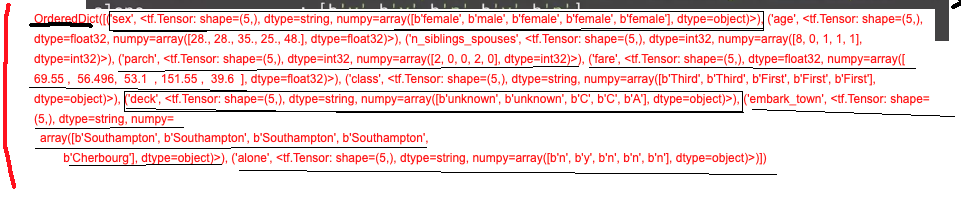

It is saying the batch is a dictionary

('sex', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'female', b'male', b'male', b'male', b'male'], dtype=object)>) is telling you that the feature 'sex' is that array

In [23]:
def show_batch(dataset):
  for batch,label in dataset.take(1):
    for key,value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))


In [25]:
show_batch(raw_train_data)

OrderedDict([('sex', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'male', b'male', b'male', b'male', b'male'], dtype=object)>), ('age', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([45.,  3.,  1., 21., 52.], dtype=float32)>), ('n_siblings_spouses', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 4, 0, 0], dtype=int32)>), ('parch', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 1, 0, 0], dtype=int32)>), ('fare', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([26.55 , 18.75 , 39.688, 73.5  , 30.5  ], dtype=float32)>), ('class', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'First', b'Second', b'Third', b'Second', b'First'], dtype=object)>), ('deck', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'unknown', b'unknown', b'unknown', b'unknown', b'C'], dtype=object)>), ('embark_town', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Southampton', b'Southampton', b'Southampton', b'Southampton',
       b'Southampton'], dtype=object)>), ('alone'

As you can see, the columns in the CSV are named. The dataset constructor will pick these names up automatically. If the file you are working with does not contain the column names in the first line, pass them in a list of strings to  the `column_names` argument in the `make_csv_dataset` function.

In [26]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

OrderedDict([('sex', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'male', b'male', b'male', b'male', b'male'], dtype=object)>), ('age', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([28., 34., 28., 25., 45.], dtype=float32)>), ('n_siblings_spouses', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0], dtype=int32)>), ('parch', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0], dtype=int32)>), ('fare', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 7.75 ,  6.496, 47.1  ,  7.05 ,  6.975], dtype=float32)>), ('class', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'Third', b'Third', b'First', b'Third', b'Third'], dtype=object)>), ('deck', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'unknown', b'unknown', b'unknown', b'unknown', b'unknown'],
      dtype=object)>), ('embark_town', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Queenstown', b'Southampton', b'Southampton', b'Southampton',
       b'Southampton'], dtype=object)>)

This example is going to use all the available columns. If you need to omit some columns from the dataset, create a list of just the columns you plan to use, and pass it into the (optional) `select_columns` argument of the constructor.


In [27]:
SELECT_COLUMNS = ['survived', 'age','n_siblings_spouses', 'class', 'deck', 'alone']
temp_dataset = get_dataset(train_file_path, select_columns = SELECT_COLUMNS)
show_batch(temp_dataset)

OrderedDict([('age', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([28., 28., 17., 18., 28.], dtype=float32)>), ('n_siblings_spouses', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 0, 4, 0, 1], dtype=int32)>), ('class', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'Third', b'Third', b'Third', b'Second', b'First'], dtype=object)>), ('deck', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'unknown', b'unknown', b'unknown', b'unknown', b'C'], dtype=object)>), ('alone', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'n', b'y', b'n', b'n', b'n'], dtype=object)>)])
age                 : [28. 28. 17. 18. 28.]
n_siblings_spouses  : [1 0 4 0 1]
class               : [b'Third' b'Third' b'Third' b'Second' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'C']
alone               : [b'n' b'y' b'n' b'n' b'n']


#Data preprocessing

If your data is already in an appropriate numeric format, you can pack the data into a vector before passing it off to the model:

In [45]:
#'survived is the label column so you want it to be an int'
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path, 
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)

OrderedDict([('age', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([51., 27., 34., 40., 36.], dtype=float32)>), ('n_siblings_spouses', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>), ('parch', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>), ('fare', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 8.05, 10.5 , 13.  ,  0.  , 10.5 ], dtype=float32)>)])
age                 : [51. 27. 34. 40. 36.]
n_siblings_spouses  : [0. 0. 0. 0. 0.]
parch               : [0. 0. 0. 0. 0.]
fare                : [ 8.05 10.5  13.    0.   10.5 ]


In [46]:
example_batch, labels_batch = next(iter(temp_dataset)) 

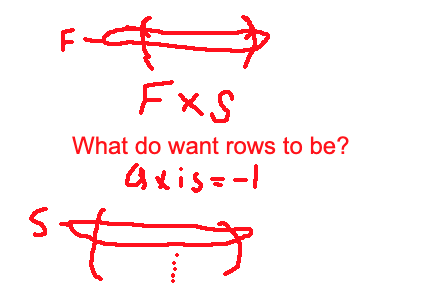

In [75]:
def pack(features, label):
  #Takes in a batch, which is a tuple. 
  # How do I know this? look at the above cell 
  #stack is asking, what do you want you row's to be??
  return tf.stack(list(features.values()), axis=-1),label

In [74]:
packed_dataset = temp_dataset.map(pack)
for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print(features.numpy().shape)
  print()
  print(labels.numpy())

[[34.     0.     0.    13.   ]
 [28.     0.     0.    30.696]
 [31.     1.     1.    37.004]
 [28.     0.     0.     7.75 ]
 [28.     0.     0.    29.7  ]]
(5, 4)

[0 0 0 1 1]


If you have mixed datatypes you may want to separate out these simple-numeric fields. The `tf.feature_column` api can handle them, but this incurs some overhead and should be avoided unless really necessary. Switch back to the mixed dataset:

In [89]:
show_batch(raw_train_data)

OrderedDict([('sex', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'male', b'male', b'female', b'male', b'male'], dtype=object)>), ('age', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([34.5, 28. , 14. , 28. , 19. ], dtype=float32)>), ('n_siblings_spouses', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 0, 0], dtype=int32)>), ('parch', <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0], dtype=int32)>), ('fare', <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 6.438,  6.858, 30.071, 30.696,  7.775], dtype=float32)>), ('class', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'Third', b'Third', b'Second', b'First', b'Third'], dtype=object)>), ('deck', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'unknown', b'unknown', b'unknown', b'unknown', b'unknown'],
      dtype=object)>), ('embark_town', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Cherbourg', b'Queenstown', b'Cherbourg', b'Cherbourg',
       b'Southampton'], dtype=object)

In [ ]:
example_batch, labels_batch = next(iter(temp_dataset)) 

So define a more general preprocessor that selects a list of numeric features and packs them into a single column:

In [92]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [93]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [94]:
show_batch(packed_train_data)

OrderedDict([('sex', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'male', b'male', b'female', b'male', b'female'], dtype=object)>), ('class', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'Third', b'Third', b'First', b'Second', b'Third'], dtype=object)>), ('deck', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'unknown', b'unknown', b'unknown', b'unknown', b'unknown'],
      dtype=object)>), ('embark_town', <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Southampton', b'Southampton', b'Southampton', b'Southampton',
       b'Queenstown'], dtype=object)>), ('alone', <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'y', b'y', b'y', b'y', b'y'], dtype=object)>), ('numeric', <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[51.   ,  0.   ,  0.   ,  8.05 ],
       [55.5  ,  0.   ,  0.   ,  8.05 ],
       [26.   ,  0.   ,  0.   , 78.85 ],
       [39.   ,  0.   ,  0.   , 13.   ],
       [28.   ,  0.   ,  0.   ,  7.733]], dtype=float32)>)])
sex                 

#Data Normalization

In [95]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [97]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [98]:
def normalize_numeric_data(data, mean, std):
  # Center the data
  return (data-mean)/std


Now create a numeric column. The `tf.feature_columns.numeric_column` API accepts a `normalizer_fn` argument, which will be run on each batch.

Bind the `MEAN` and `STD` to the normalizer fn using [`functools.partial`](https://docs.python.org/3/library/functools.html#functools.partial).

In [103]:
#This is a partial fuction where it's arguments mean and std is set but data is not 
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7fa4a755dc80>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [104]:
example_batch['numeric']

KeyError: ignored

In [105]:
example_batch

OrderedDict([('age',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([28., 28.,  5., 44., 28.], dtype=float32)>),
             ('n_siblings_spouses',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 8., 2., 2., 0.], dtype=float32)>),
             ('parch',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 2., 1., 0., 0.], dtype=float32)>),
             ('fare',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([15.5  , 69.55 , 19.258, 90.   ,  7.75 ], dtype=float32)>)])